## Import dependencies

In [1]:
!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchsummary import summary
from torchvision import datasets, transforms

In [3]:
from training.utils import get_device, print_cuda_info
from training.data_prep import load_data

## Load and prepare data

In [4]:
print_cuda_info()

CUDA Available? True


In [5]:
input_image_size = (28, 28)
train_data, test_data = load_data(train_transforms=[
     # transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
        transforms.Resize(input_image_size),
        # transforms.RandomRotation((-7., 7.), fill=0),
])

In [6]:
from training.model_trainer import ModelTrainer

trainer = ModelTrainer()

trainer.init_data_loaders(train_data, test_data, batch_size=512,
                          shuffle=True, num_workers=2, pin_memory=True)

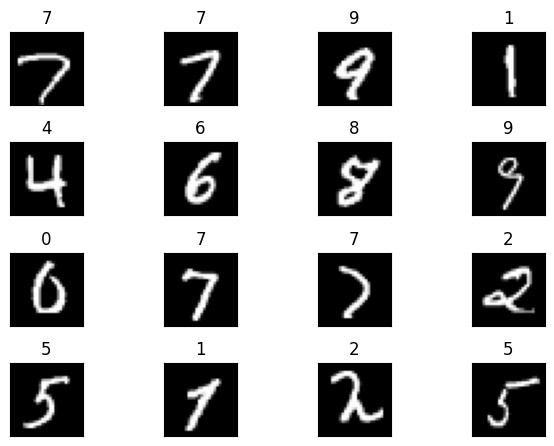

In [7]:
trainer.show_sample_images_from_dataset(4,4)

## Load Model

In [8]:
from models.model_2 import Net
device = get_device()

model = Net().to(device)
summary(model, input_size=(1,*input_image_size))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
              ReLU-2           [-1, 32, 26, 26]               0
       BatchNorm2d-3           [-1, 32, 26, 26]              64
            Conv2d-4           [-1, 64, 24, 24]          18,496
              ReLU-5           [-1, 64, 24, 24]               0
       BatchNorm2d-6           [-1, 64, 24, 24]             128
            Conv2d-7          [-1, 128, 22, 22]          73,856
              ReLU-8          [-1, 128, 22, 22]               0
       BatchNorm2d-9          [-1, 128, 22, 22]             256
        MaxPool2d-10          [-1, 128, 11, 11]               0
           Conv2d-11           [-1, 16, 11, 11]           2,064
           Conv2d-12             [-1, 32, 9, 9]           4,640
             ReLU-13             [-1, 32, 9, 9]               0
      BatchNorm2d-14             [-1, 3

/content/models/model_2.py:62: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


## Start training

In [9]:
device = torch.cuda.current_device()
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1, verbose=True)
criterion = F.nll_loss
num_epochs = 15

trainer.run_training(model, device, optimizer, criterion, scheduler, num_epochs)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.0264 Batch_id=117 Accuracy=94.78: 100%|██████████| 118/118 [00:20<00:00,  5.76it/s]


Test set: Average loss: 0.0406, Accuracy: 9878/10000 (98.78%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.0049 Batch_id=117 Accuracy=99.08: 100%|██████████| 118/118 [00:16<00:00,  7.15it/s]


Test set: Average loss: 0.0268, Accuracy: 9918/10000 (99.18%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0129 Batch_id=117 Accuracy=99.51: 100%|██████████| 118/118 [00:17<00:00,  6.84it/s]


Test set: Average loss: 0.0243, Accuracy: 9923/10000 (99.23%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0131 Batch_id=117 Accuracy=99.73: 100%|██████████| 118/118 [00:16<00:00,  7.02it/s]


Test set: Average loss: 0.0205, Accuracy: 9938/10000 (99.38%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0040 Batch_id=117 Accuracy=99.84: 100%|██████████| 118/118 [00:17<00:00,  6.74it/s]


Test set: Average loss: 0.0210, Accuracy: 9933/10000 (99.33%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0113 Batch_id=117 Accuracy=99.94: 100%|██████████| 118/118 [00:17<00:00,  6.91it/s]


Test set: Average loss: 0.0219, Accuracy: 9932/10000 (99.32%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0018 Batch_id=117 Accuracy=99.97: 100%|██████████| 118/118 [00:17<00:00,  6.57it/s]


Test set: Average loss: 0.0219, Accuracy: 9930/10000 (99.30%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0017 Batch_id=117 Accuracy=99.99: 100%|██████████| 118/118 [00:16<00:00,  7.02it/s]


Test set: Average loss: 0.0195, Accuracy: 9939/10000 (99.39%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0004 Batch_id=117 Accuracy=100.00: 100%|██████████| 118/118 [00:17<00:00,  6.59it/s]


Test set: Average loss: 0.0192, Accuracy: 9941/10000 (99.41%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0023 Batch_id=117 Accuracy=100.00: 100%|██████████| 118/118 [00:16<00:00,  6.95it/s]


Test set: Average loss: 0.0192, Accuracy: 9943/10000 (99.43%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 11


Train: Loss=0.0002 Batch_id=117 Accuracy=100.00: 100%|██████████| 118/118 [00:18<00:00,  6.48it/s]


Test set: Average loss: 0.0189, Accuracy: 9941/10000 (99.41%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 12


Train: Loss=0.0008 Batch_id=117 Accuracy=100.00: 100%|██████████| 118/118 [00:17<00:00,  6.77it/s]


Test set: Average loss: 0.0192, Accuracy: 9941/10000 (99.41%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 13


Train: Loss=0.0017 Batch_id=117 Accuracy=100.00: 100%|██████████| 118/118 [00:17<00:00,  6.86it/s]


Test set: Average loss: 0.0191, Accuracy: 9942/10000 (99.42%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 14


Train: Loss=0.0012 Batch_id=117 Accuracy=100.00: 100%|██████████| 118/118 [00:16<00:00,  6.96it/s]


Test set: Average loss: 0.0188, Accuracy: 9938/10000 (99.38%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 15


Train: Loss=0.0006 Batch_id=117 Accuracy=100.00: 100%|██████████| 118/118 [00:16<00:00,  6.99it/s]


Test set: Average loss: 0.0188, Accuracy: 9940/10000 (99.40%)

Adjusting learning rate of group 0 to 1.0000e-03.


## Analyze Results

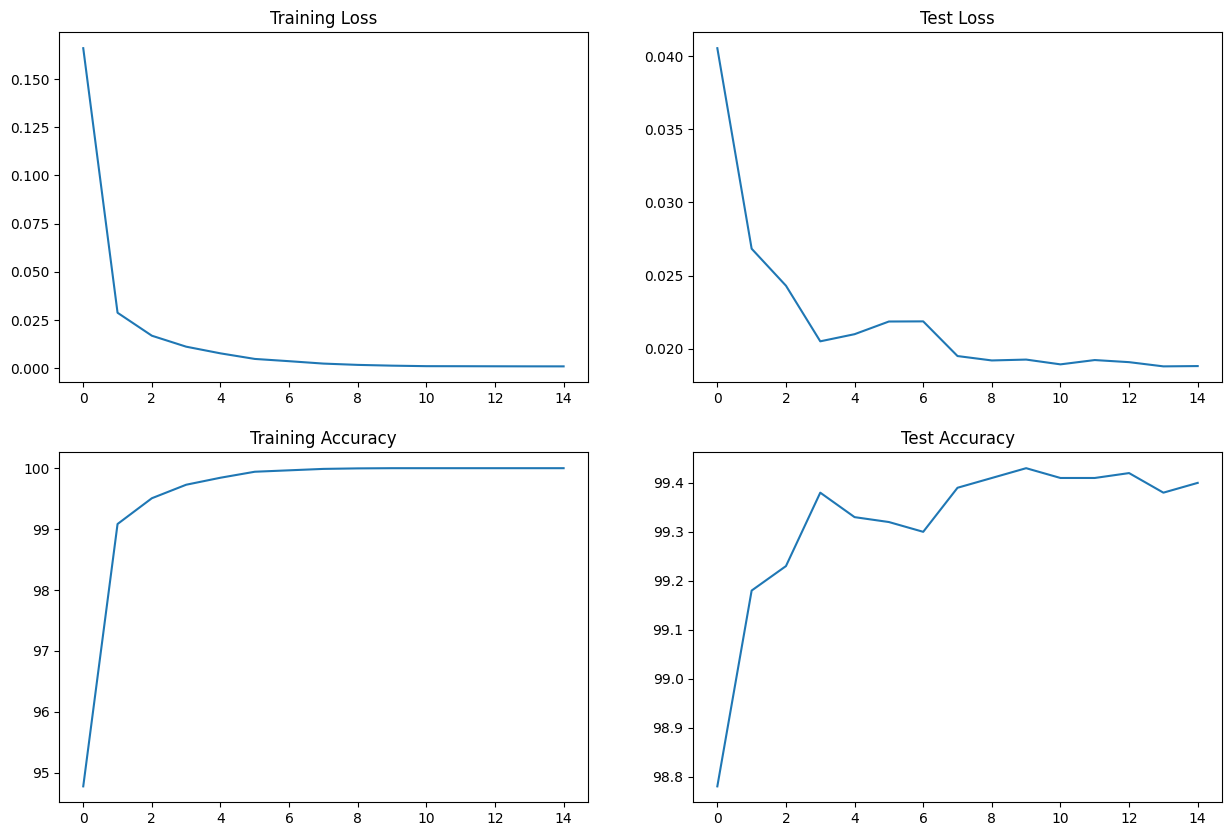

In [10]:
trainer.plot_accuracy_and_loss(fig_size=(15, 10))

In [11]:
# Target:
#   Make the model converge faster.
# Results:
#   Parameters: 511,354
#   Best train accuracy: 100
#   Best test accuracy: 99.43
# Analysis:
#   The model converged quickly.
#   The model has overfit completely on the train dataset. Seriously started overfitting starting from 5th epoch.
